In [ ]:
import os
import numpy as np
import rasterio
import pickle
import skimage.feature

In [ ]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


Loaing S2 Data and Reading Shape

In [ ]:
import os
import numpy as np
import pickle

# Correct file path
files_path = "c:\\Users\\Dell\\Desktop\\Sentinal 2\\"

# Check file sizes
file_sizes = {f: os.path.getsize(files_path + f) for f in os.listdir(files_path)}
print("File sizes (in bytes):", file_sizes)

# Load a small portion of the file to get the metadata
temp_bands = np.load(files_path + 'BANDS.npy', mmap_mode='r')
shape = temp_bands.shape
dtype = temp_bands.dtype
del temp_bands  # Release the temporary memory-mapped array

# Using memory mapping to load large .npy file
bands = np.memmap(files_path + 'BANDS.npy', dtype=dtype, mode='r', shape=shape)
clp = np.load(files_path + 'CLP.npy')
is_data = np.load(files_path + 'IS_DATA.npy')
norm_factors = np.load(files_path + 'NORM_FACTORS.npy')
scl = np.load(files_path + 'SCL.npy')

# Loading .pkl files with error handling
def load_pickle_file(file_path):
    try:
        with open(file_path, 'rb') as f:
            return pickle.load(f)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

bbox = load_pickle_file(files_path + 'bbox.pkl')
meta_info = load_pickle_file(files_path + 'meta_info.pkl')
timestamp = load_pickle_file(files_path + 'timestamp.pkl')

# Exploring the data
print("Bands shape:", bands.shape)
print("Bands size (in bytes):", bands.nbytes)
print("File size of BANDS.npy:", os.path.getsize(files_path + 'BANDS.npy'))
print("CLP shape:", clp.shape)
print("IS_DATA shape:", is_data.shape)
print("Normalization factors shape:", norm_factors.shape)
print("SCL shape:", scl.shape)

print("Bounding box:", bbox)
print("Metadata:", meta_info)
print("Timestamp:", timestamp)


File sizes (in bytes): {'azcopy_windows_amd64_10.25.1.zip': 16538997, 'BANDS.npy': 19906560128, 'bbox.pkl': 184, 'CLP.npy': 829440128, 'Crops_GT_Brandenburg_Doc.pdf': 71678, 'IS_DATA.npy': 829440128, 'meta_info.json': 138, 'meta_info.pkl': 348, 'NORMALIZED_BANDS.npy': 9953280128, 'NORM_FACTORS.npy': 704, 'requirements (1).txt': 105, 'requirements.txt': 105, 's1dataset.py': 7580, 's2dataset.py': 7868, 'SCL.npy': 829440128, 'sitemap.xml': 524, 'timestamp.pkl': 14759, 'visualization.ipynb': 595176, '__pycache__': 0}
Error loading c:\Users\Dell\Desktop\Sentinal 2\meta_info.pkl: No module named 'eolearn'
Bands shape: (144, 2400, 2400, 12)
Bands size (in bytes): 19906560000
File size of BANDS.npy: 19906560128
CLP shape: (144, 2400, 2400, 1)
IS_DATA shape: (144, 2400, 2400, 1)
Normalization factors shape: (144, 1)
SCL shape: (144, 2400, 2400, 1)
Bounding box: 408000.1106542662,5831999.778170622,432000.083625369,5856000.355934586
Metadata: None
Timestamp: [datetime.datetime(2019, 1, 2, 10, 26,

C:\Users\Dell\AppData\Local\Temp\ipykernel_26104\733460516.py:47: SHDeprecationWarning: The string representation of `BBox` will change to match its `repr` representation.
  print("Bounding box:", bbox)


Visualize S2

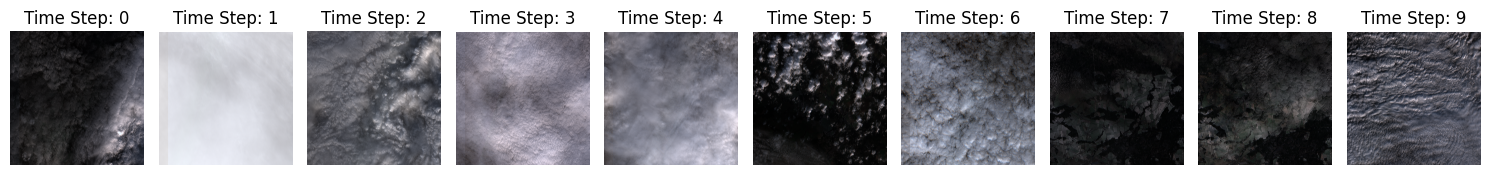

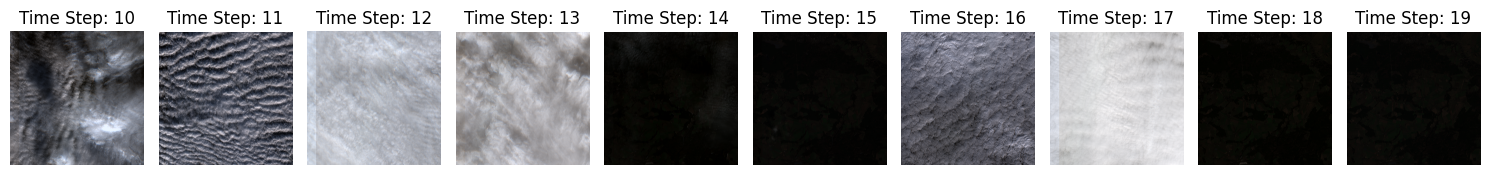

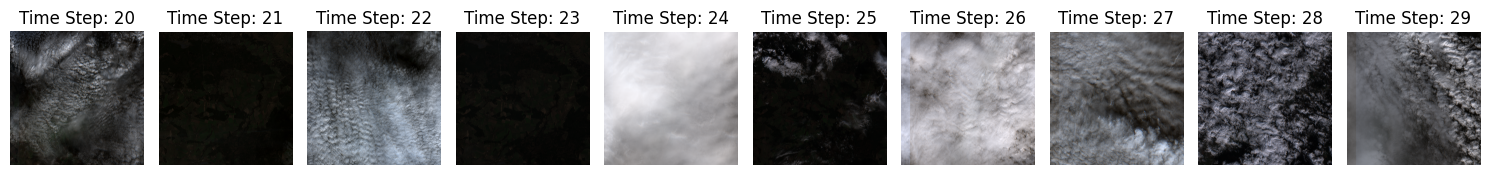

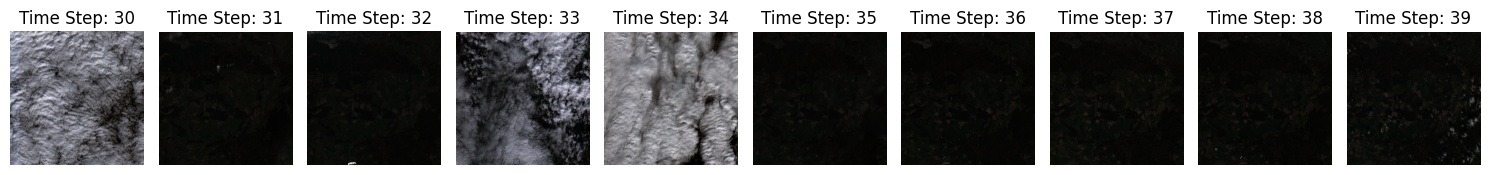

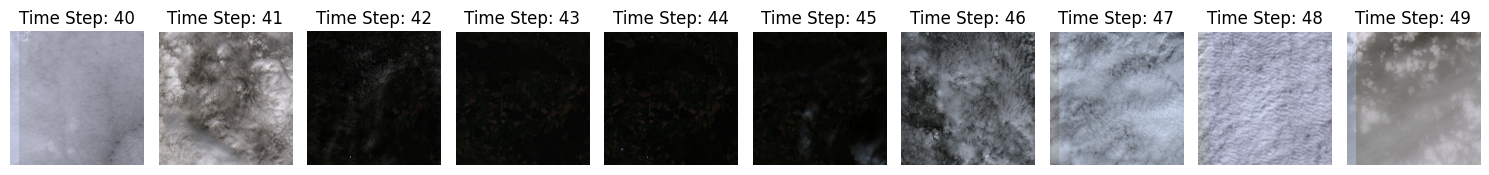

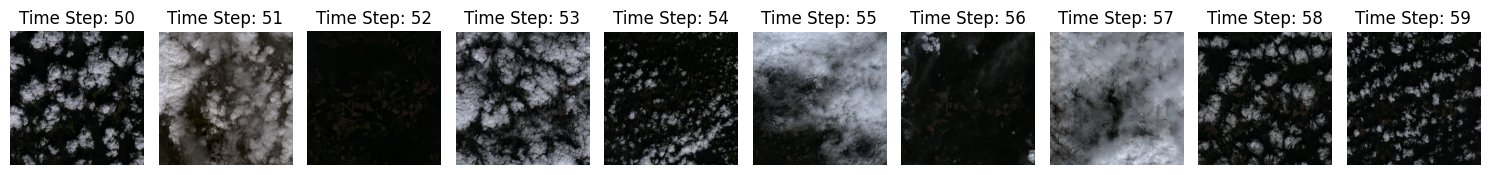

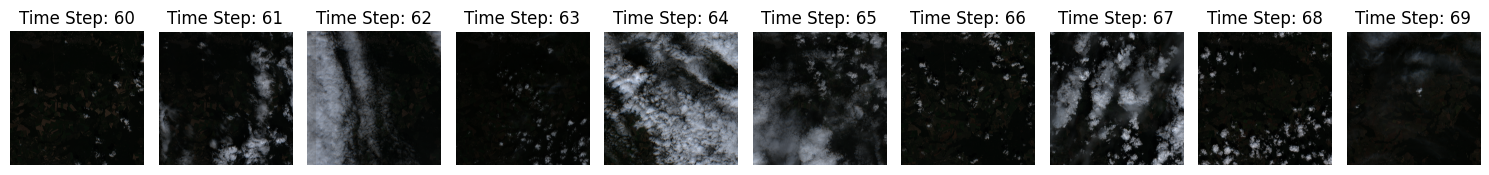

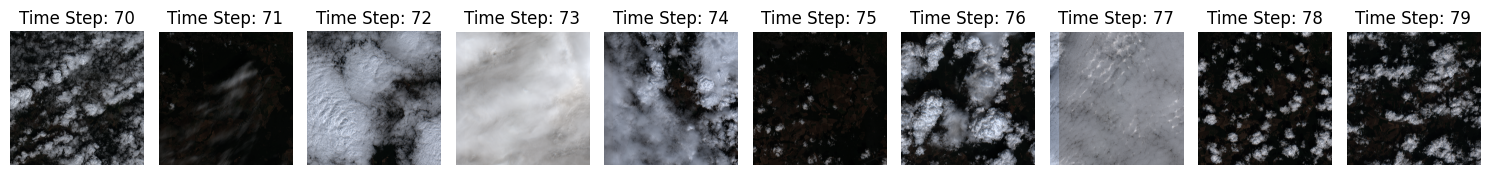

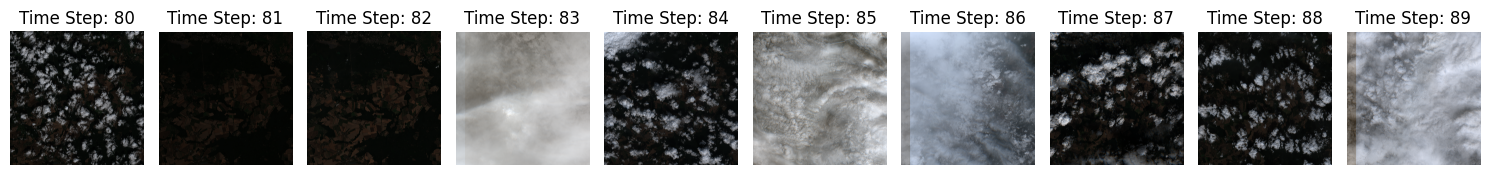

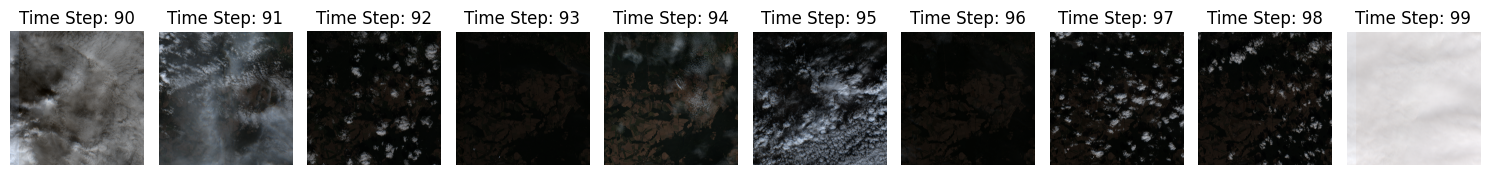

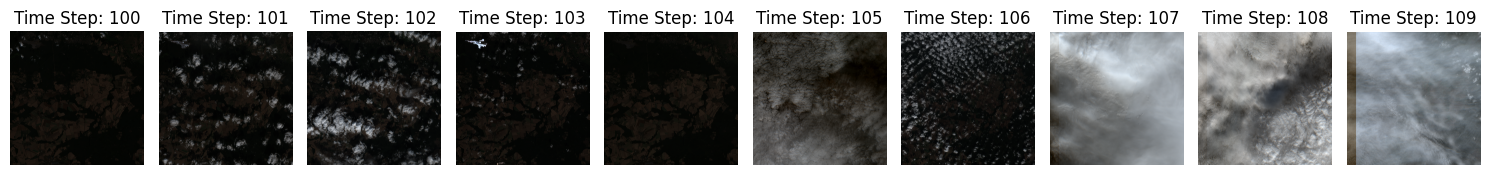

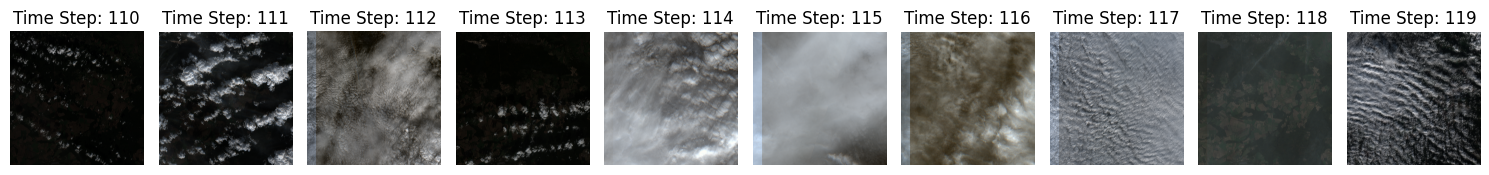

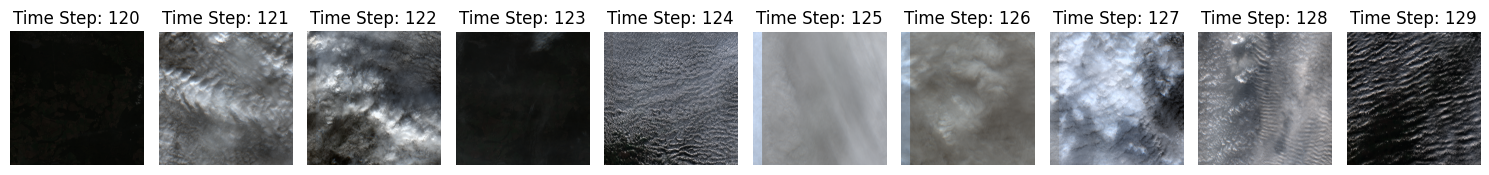

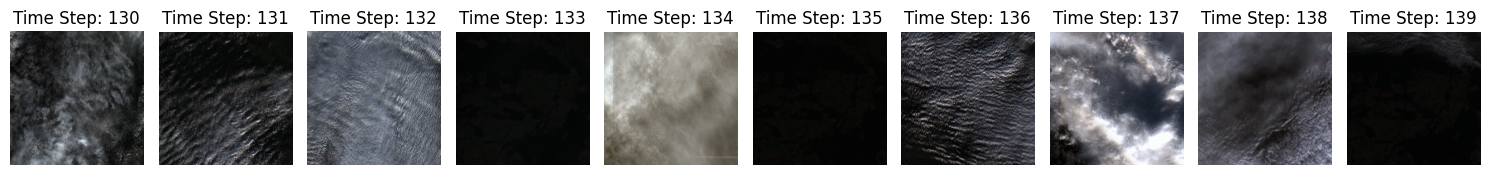

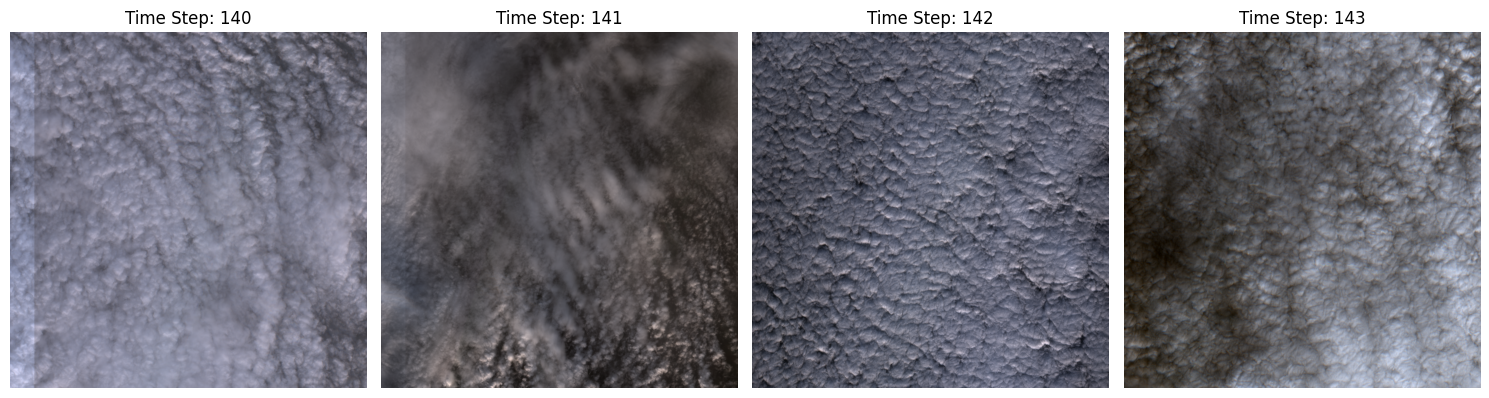

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the file path to your bands data
file_path = 'c:\\Users\\Dell\\Desktop\\Sentinal 2\\BANDS.npy'

# Load the data using memory mapping
bands = np.load(file_path, mmap_mode='r')

# Function to normalize and extract RGB channels for a batch of images
def process_batch(bands, start, end):
    # Extract Red, Green, Blue bands (indices might need adjustment based on your data)
    red = bands[start:end, ..., 3]  # Assuming index 3 is Red
    green = bands[start:end, ..., 2]  # Assuming index 2 is Green
    blue = bands[start:end, ..., 1]  # Assuming index 1 is Blue

    # Stack and normalize
    rgb_batch = np.stack([red, green, blue], axis=-1)
    max_val = np.max(rgb_batch, axis=(1, 2, 3), keepdims=True)
    rgb_normalized = (rgb_batch / max_val).astype(float)
    
    return rgb_normalized

# Display function for RGB images
def display_images(rgb_images, start):
    plt.figure(figsize=(15, 10))
    for i, img in enumerate(rgb_images):
        plt.subplot(1, len(rgb_images), i+1)
        plt.imshow(img)
        plt.title(f'Time Step: {start + i}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Process and display in batches
batch_size = 10  # Process 10 time steps at a time
num_steps = bands.shape[0]

for start in range(0, num_steps, batch_size):
    end = min(start + batch_size, num_steps)
    rgb_images = process_batch(bands, start, end)
    display_images(rgb_images, start)
